# Initial Exploration of the Top Tagging Jet Dataset

In [1]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [2]:
import numpy as np
import os
import h5py
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

## Load Data

In [3]:
input_dir = "/global/cscratch1/sd/danieltm/ExaTrkX/top_tagging/raw_input"
input_file = "train.h5"

In [4]:
with pd.HDFStore(os.path.join(input_dir, input_file), mode='r') as store:
        df = store['table']

## Distributions

In [11]:
def plot_energies(jet_series): 
    energies = [jet_series[f'E_{i}'] for i in range(200)]
    sns.distplot(energies)

Maximum energy distribution

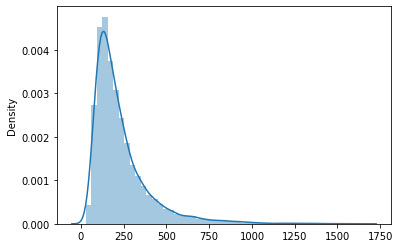

In [12]:
sns.distplot([df.iloc[i]["E_0"] for i in range(10000)])

In [16]:
df.columns.tolist()

['E_0',
 'PX_0',
 'PY_0',
 'PZ_0',
 'E_1',
 'PX_1',
 'PY_1',
 'PZ_1',
 'E_2',
 'PX_2',
 'PY_2',
 'PZ_2',
 'E_3',
 'PX_3',
 'PY_3',
 'PZ_3',
 'E_4',
 'PX_4',
 'PY_4',
 'PZ_4',
 'E_5',
 'PX_5',
 'PY_5',
 'PZ_5',
 'E_6',
 'PX_6',
 'PY_6',
 'PZ_6',
 'E_7',
 'PX_7',
 'PY_7',
 'PZ_7',
 'E_8',
 'PX_8',
 'PY_8',
 'PZ_8',
 'E_9',
 'PX_9',
 'PY_9',
 'PZ_9',
 'E_10',
 'PX_10',
 'PY_10',
 'PZ_10',
 'E_11',
 'PX_11',
 'PY_11',
 'PZ_11',
 'E_12',
 'PX_12',
 'PY_12',
 'PZ_12',
 'E_13',
 'PX_13',
 'PY_13',
 'PZ_13',
 'E_14',
 'PX_14',
 'PY_14',
 'PZ_14',
 'E_15',
 'PX_15',
 'PY_15',
 'PZ_15',
 'E_16',
 'PX_16',
 'PY_16',
 'PZ_16',
 'E_17',
 'PX_17',
 'PY_17',
 'PZ_17',
 'E_18',
 'PX_18',
 'PY_18',
 'PZ_18',
 'E_19',
 'PX_19',
 'PY_19',
 'PZ_19',
 'E_20',
 'PX_20',
 'PY_20',
 'PZ_20',
 'E_21',
 'PX_21',
 'PY_21',
 'PZ_21',
 'E_22',
 'PX_22',
 'PY_22',
 'PZ_22',
 'E_23',
 'PX_23',
 'PY_23',
 'PZ_23',
 'E_24',
 'PX_24',
 'PY_24',
 'PZ_24',
 'E_25',
 'PX_25',
 'PY_25',
 'PZ_25',
 'E_26',
 'PX_26',
 'PY_26

Distributions of P_x, P_y, P_z

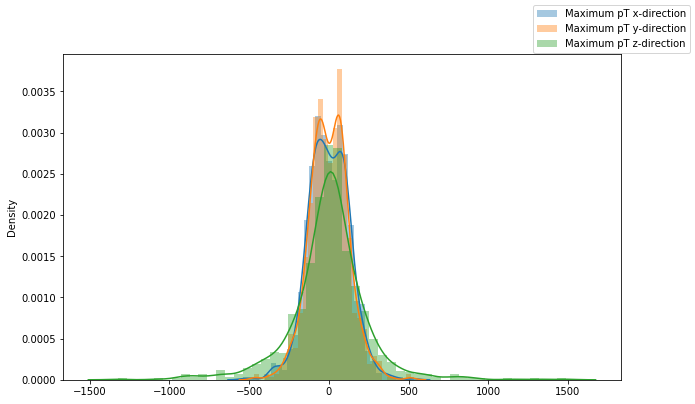

In [25]:
num_jets = 1000
fig = plt.figure(figsize=(10,6))
sns.distplot([df.iloc[i]["PX_0"] for i in range(num_jets)], label="Maximum pT x-direction")
sns.distplot([df.iloc[i]["PY_0"] for i in range(num_jets)], label="Maximum pT y-direction")
sns.distplot([df.iloc[i]["PZ_0"] for i in range(num_jets)], label="Maximum pT z-direction")
fig.legend()

Text(0.5, 0, 'Transverse Momentum of Most Energetic Constituent (GeV)')

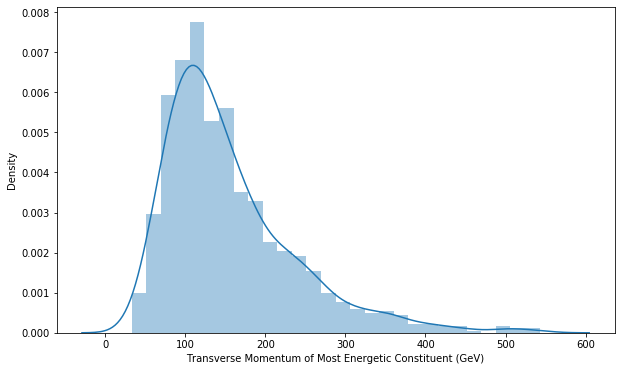

In [31]:
num_jets = 1000
fig = plt.figure(figsize=(10,6))
sns.distplot([np.sqrt(df.iloc[i]["PX_0"]**2 + df.iloc[i]["PY_0"]**2) for i in range(num_jets)])
plt.xlabel("Transverse Momentum of Most Energetic Constituent (GeV)")

## Calorimetry Image

Convert to phi, eta, plot 2D weighted histogram

In [19]:
def calc_eta_phi(x, y, z):
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(r, z)
    eta = -1. * np.log(np.tan(theta / 2.))
    phi = np.arctan2(y, x)
    
    return eta, phi

In [35]:
df.columns.tolist()

['E_0',
 'PX_0',
 'PY_0',
 'PZ_0',
 'E_1',
 'PX_1',
 'PY_1',
 'PZ_1',
 'E_2',
 'PX_2',
 'PY_2',
 'PZ_2',
 'E_3',
 'PX_3',
 'PY_3',
 'PZ_3',
 'E_4',
 'PX_4',
 'PY_4',
 'PZ_4',
 'E_5',
 'PX_5',
 'PY_5',
 'PZ_5',
 'E_6',
 'PX_6',
 'PY_6',
 'PZ_6',
 'E_7',
 'PX_7',
 'PY_7',
 'PZ_7',
 'E_8',
 'PX_8',
 'PY_8',
 'PZ_8',
 'E_9',
 'PX_9',
 'PY_9',
 'PZ_9',
 'E_10',
 'PX_10',
 'PY_10',
 'PZ_10',
 'E_11',
 'PX_11',
 'PY_11',
 'PZ_11',
 'E_12',
 'PX_12',
 'PY_12',
 'PZ_12',
 'E_13',
 'PX_13',
 'PY_13',
 'PZ_13',
 'E_14',
 'PX_14',
 'PY_14',
 'PZ_14',
 'E_15',
 'PX_15',
 'PY_15',
 'PZ_15',
 'E_16',
 'PX_16',
 'PY_16',
 'PZ_16',
 'E_17',
 'PX_17',
 'PY_17',
 'PZ_17',
 'E_18',
 'PX_18',
 'PY_18',
 'PZ_18',
 'E_19',
 'PX_19',
 'PY_19',
 'PZ_19',
 'E_20',
 'PX_20',
 'PY_20',
 'PZ_20',
 'E_21',
 'PX_21',
 'PY_21',
 'PZ_21',
 'E_22',
 'PX_22',
 'PY_22',
 'PZ_22',
 'E_23',
 'PX_23',
 'PY_23',
 'PZ_23',
 'E_24',
 'PX_24',
 'PY_24',
 'PZ_24',
 'E_25',
 'PX_25',
 'PY_25',
 'PZ_25',
 'E_26',
 'PX_26',
 'PY_26

In [20]:
def get_eta_phi_values(jet_series):
    
    energies = np.array([jet_series[f'E_{i}'] for i in range(200)])
    x_values = np.array([jet_series[f'PX_{i}'] for i in range(200)])
    y_values = np.array([jet_series[f'PY_{i}'] for i in range(200)])
    z_values = np.array([jet_series[f'PZ_{i}'] for i in range(200)])

    existing_jet_mask = energies > 0
    energies, x_values, y_values, z_values = energies[existing_jet_mask], x_values[existing_jet_mask], y_values[existing_jet_mask], z_values[existing_jet_mask]

    eta_values, phi_values = calc_eta_phi(x_values, y_values, z_values)
    
    return eta_values, phi_values, energies

Example jet image

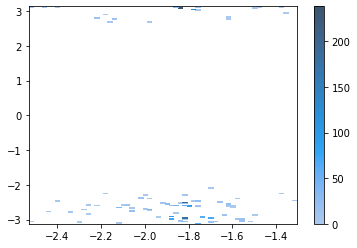

In [75]:
jet_number = 10

eta_values, phi_values, energies = get_eta_phi_values(df.iloc[jet_number])

sns.histplot(x = eta_values, y = phi_values, weights = energies, binwidth=0.02, palette=matplotlib.colors.Colormap("viridis"), cbar=True)
# sns.histplot(x = x_values, y = y_values, weights = energies, binwidth=2)

All jet images

In [160]:
%%time
num_jets  = 10000
df_sample = df.sample(n = num_jets)

all_eta_values, all_phi_values, all_energies = [], [], []

for jet in range(len(df_sample)):
    
    eta_values, phi_values, energies = get_eta_phi_values(df_sample.iloc[jet])
    
    all_eta_values.append(eta_values)
    all_phi_values.append(phi_values)
    all_energies.append(energies)
    
all_eta_values = np.concatenate(all_eta_values)
all_phi_values = np.concatenate(all_phi_values)
all_energies = np.concatenate(all_energies)

CPU times: user 42.3 s, sys: 740 ms, total: 43.1 s
Wall time: 43.1 s


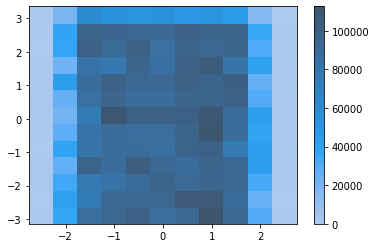

In [161]:
sns.histplot(x = all_eta_values, y = all_phi_values, weights = all_energies, binwidth=0.5, palette=matplotlib.colors.Colormap("viridis"), cbar=True)

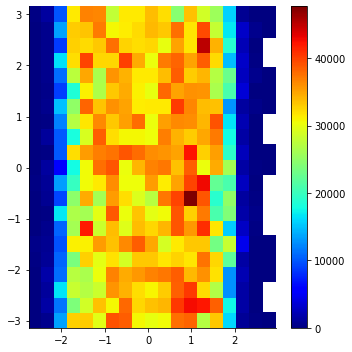

In [166]:
sns.displot(x = all_eta_values, y = all_phi_values, weights = all_energies, binwidth=0.3, cmap=matplotlib.cm.jet,  cbar=True)

/global/homes/d/danieltm/.conda/envs/exatrkx-test/lib/python3.7/site-packages/seaborn/distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0`, but please update your code.
  warnings.warn(msg, UserWarning)


CPU times: user 26.3 s, sys: 5.34 ms, total: 26.3 s
Wall time: 26.3 s


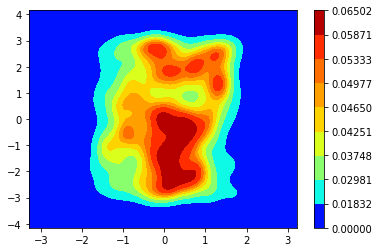

In [159]:
%%time
sns.kdeplot(x = all_eta_values, y = all_phi_values, shade=True, shade_lowest=True, cmap=matplotlib.cm.jet, cbar=True)

## Processed Images

Here we aim to reproduce the distribution plots of https://arxiv.org/pdf/1902.09914.pdf

### Processing

1. Center the jet around the most energetic constituent
2. Rotate the second-most energetic constituent to 12 o'clock
3. Ensure the third-most energetic constituent is on the right of the eta-phi space
4. Ensure energy/momentum is in log-space

In [78]:
def reset_angle(angles):
    
    angles[angles > np.pi] = angles[angles > np.pi] - 2*np.pi
    angles[angles < -np.pi] = angles[angles < -np.pi] + 2*np.pi
    
    return angles

In [110]:
def rotate_to_12(eta_values, phi_values):
    
    theta_0 = np.arctan(eta_values[1]/phi_values[1])
    thetas = np.arctan(eta_values[1:]/phi_values[1:])
    rs = np.sqrt(eta_values[1:]**2 + phi_values[1:]**2)

    new_thetas = thetas - theta_0

    new_phis, new_etas = rs * np.cos(new_thetas), rs * np.sin(new_thetas)
    
    eta_values[1:], phi_values[1:] = new_etas, new_phis
    
    return eta_values, phi_values

In [34]:
def get_eta_phi_values(jet_tuple):
    
    energies = np.array([getattr(jet_tuple, f'E_{i}') for i in range(200)])
    x_values = np.array([getattr(jet_tuple, f'PX_{i}') for i in range(200)])
    y_values = np.array([getattr(jet_tuple, f'PY_{i}') for i in range(200)])
    z_values = np.array([getattr(jet_tuple, f'PZ_{i}') for i in range(200)])
    
    existing_jet_mask = energies > 0
    energies, x_values, y_values, z_values = energies[existing_jet_mask], x_values[existing_jet_mask], y_values[existing_jet_mask], z_values[existing_jet_mask]

    eta_values, phi_values = calc_eta_phi(x_values, y_values, z_values)
    
    log_energies = np.log(energies)
    
    return eta_values, phi_values, energies, log_energies

In [176]:
df[df.is_signal_new == 0]

,E_0,PX_0,PY_0,PZ_0,E_1,PX_1,PY_1,PZ_1,E_2,PX_2,...,E_199,PX_199,PY_199,PZ_199,truthE,truthPX,truthPY,truthPZ,ttv,is_signal_new
375,474.071136,-250.347031,-223.651962,-334.738098,103.236237,-48.866222,-56.790775,-71.025490,105.255569,-55.415001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
377,150.504532,120.062393,76.852005,-48.274265,82.257057,63.801739,42.754807,-29.454842,48.573559,36.763199,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
378,251.645386,10.427651,-147.573746,203.564880,104.147797,10.718256,-54.497948,88.101395,78.043213,5.724113,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
379,451.566132,129.885437,-99.066292,-420.984100,208.410919,59.033958,-46.177090,-194.467941,190.183304,54.069675,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
380,399.093903,-168.432083,-47.205597,-358.717438,273.691956,-121.926941,-30.803854,-243.088928,152.837219,-44.400204,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,322.691498,162.380127,-278.789398,-6.242409,108.341850,56.450153,-92.305458,-5.571285,38.041790,20.180454,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
296,132.018082,113.493355,-11.082467,66.522263,109.423035,94.168808,-9.047709,54.988853,55.895519,47.715614,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
297,154.332977,-80.047974,-111.942764,-69.855637,67.217194,-38.805931,-47.460110,-27.564257,60.886864,-31.137854,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
298,88.743767,23.843252,83.887413,-16.427341,51.124645,4.462029,50.686417,-4.970602,49.567226,13.317486,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [179]:
%%time
num_jets  = 10000

all_eta_values, all_phi_values, all_energies = [], [], []

for jet in df[df.is_signal_new == 1].sample(n = num_jets).itertuples():
        
    # Center the jet
    eta_values, phi_values, energies, log_energies = get_eta_phi_values(jet)
    
    # Zero the central constituent
    eta_values = eta_values - eta_values[0]
    phi_values = phi_values - phi_values[0]
    
    # Set phi between [-pi, pi]
    phi_values = reset_angle(phi_values)
    
    eta_values, phi_values = rotate_to_12(eta_values, phi_values)
    
    all_eta_values.append(eta_values)
    all_phi_values.append(phi_values)
    all_energies.append(energies)
    
#     break
    
all_eta_values = np.concatenate(all_eta_values)
all_phi_values = np.concatenate(all_phi_values)
all_energies = np.concatenate(all_energies)

CPU times: user 8.06 s, sys: 1.3 s, total: 9.36 s
Wall time: 9.36 s


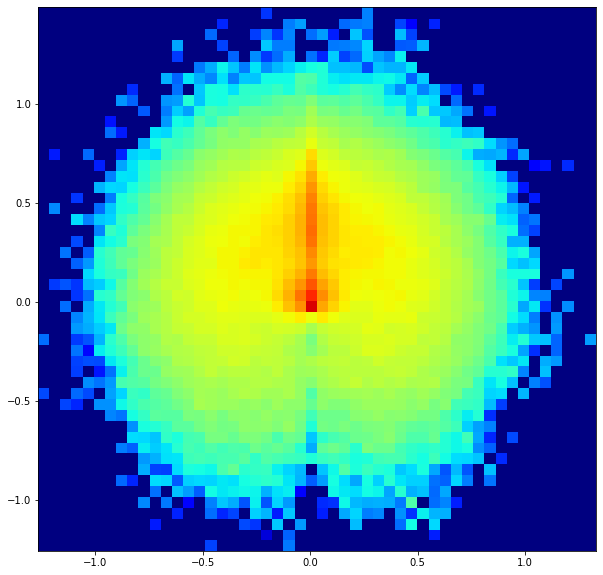

In [180]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
pcm = ax.hist2d(x = all_eta_values, y = all_phi_values, weights = all_energies, cmap=matplotlib.cm.jet, bins=50, norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03, vmin=0.0, vmax=1e7))

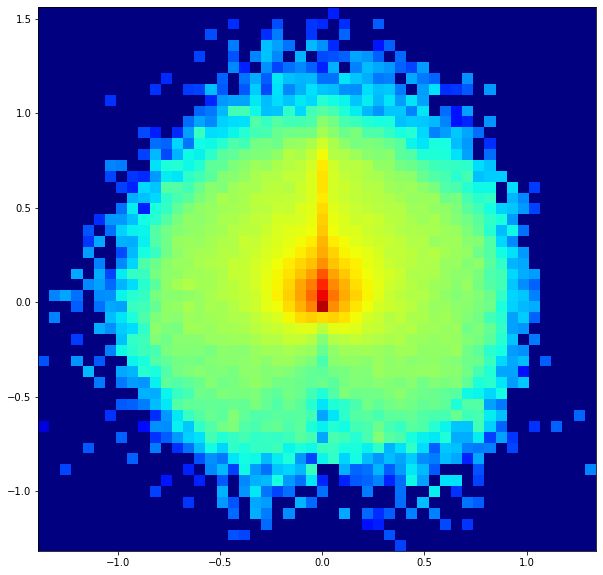

In [178]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
pcm = ax.hist2d(x = all_eta_values, y = all_phi_values, weights = all_energies, cmap=matplotlib.cm.jet, bins=50, norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03, vmin=0.0, vmax=1e7))

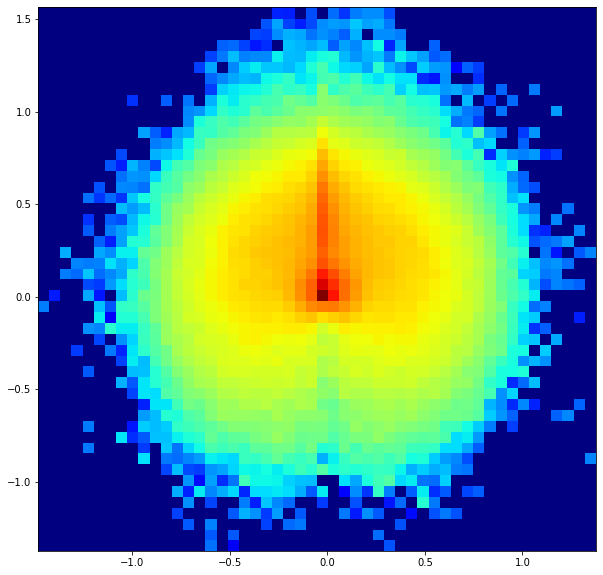

In [174]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
pcm = ax.hist2d(x = all_eta_values, y = all_phi_values, weights = all_energies, cmap=matplotlib.cm.jet, bins=50, norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03, vmin=0.0, vmax=1e7))

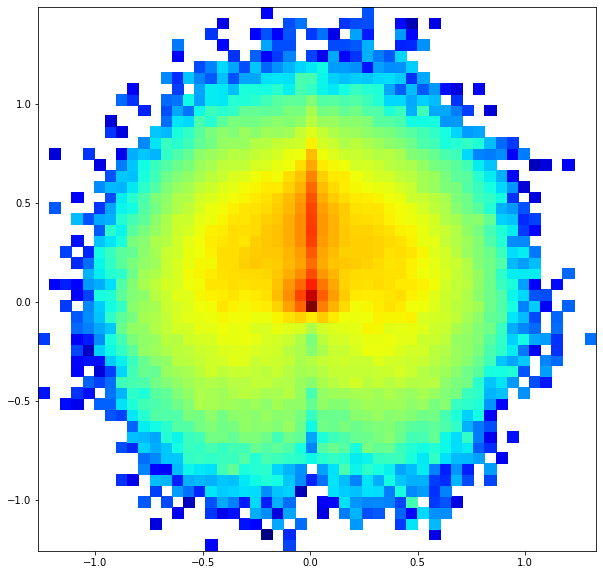

In [181]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
pcm = ax.hist2d(x = all_eta_values, y = all_phi_values, weights = all_energies, cmap=matplotlib.cm.jet, bins=50, norm=colors.LogNorm())

In [157]:
from matplotlib import colors

In [125]:
sns.displot(x = all_eta_values, y = all_phi_values, weights = all_energies, binwidth=0.1, cmap=matplotlib.cm.jet,  norm=LogNorm(), cbar=True)

ZeroDivisionError: float division by zero

ValueError: values must all be positive

<Figure size 360x360 with 2 Axes>

In [105]:
theta_0 = np.arctan(eta_values[1]/phi_values[1])
thetas = np.arctan(eta_values[1:]/phi_values[1:])
rs = np.sqrt(eta_values[1:]**2 + phi_values[1:]**2)

In [106]:
new_thetas = thetas - theta_0

In [107]:
new_phis, new_etas = rs * np.cos(new_thetas), rs * np.sin(new_thetas)